In [21]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

num_students = 80
num_subjects = np.random.randint(6, 9)  

data = {
    'Class': [],
    'Student_ID': [],
    'Name': []
}
for i in range(1, num_students + 1):
    data['Class'].append('Class A')
    data['Student_ID'].append(i)
    data['Name'].append(f'Student_{i}')
    for j in range(1, num_subjects + 1):
        data[f'Subject_{j}'] = np.random.randint(0, 101, num_students)


df = pd.DataFrame(data)

for _ in range(30):  
    row_idx = np.random.randint(0, num_students)
    col_idx = np.random.randint(3, df.shape[1])  
    df.iat[row_idx, col_idx] = np.nan

df

,Class,Student_ID,Name,Subject_1,Subject_2,Subject_3,Subject_4,Subject_5,Subject_6,Subject_7
0,Class A,1,Student_1,68.0,NaN,59.0,46.0,64.0,6.0,37.0
1,Class A,2,Student_2,65.0,95.0,19.0,6.0,39.0,79.0,66.0
2,Class A,3,Student_3,21.0,48.0,51.0,0.0,21.0,25.0,67.0
3,Class A,4,Student_4,32.0,NaN,NaN,63.0,NaN,17.0,NaN
4,Class A,5,Student_5,16.0,53.0,61.0,71.0,79.0,17.0,5.0
...,...,...,...,...,...,...,...,...,...,...
75,Class A,76,Student_76,42.0,29.0,38.0,NaN,10.0,5.0,77.0
76,Class A,77,Student_77,68.0,88.0,32.0,100.0,7.0,74.0,71.0
77,Class A,78,Student_78,28.0,15.0,47.0,19.0,77.0,37.0,36.0
78,Class A,79,Student_79,3.0,97.0,9.0,80.0,63.0,69.0,44.0


In [2]:
df.to_csv('student.csv', index=True)


In [3]:
df = pd.read_csv('student.csv')

df.rename(columns={'Student_ID': 'StudentID', 'Name': 'StudentName'}, inplace=True)
df.columns = df.columns.str.replace('Subject_', 'Subject')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   80 non-null     int64  
 1   Class        80 non-null     object 
 2   StudentID    80 non-null     int64  
 3   StudentName  80 non-null     object 
 4   Subject1     71 non-null     float64
 5   Subject2     75 non-null     float64
 6   Subject3     76 non-null     float64
 7   Subject4     76 non-null     float64
 8   Subject5     75 non-null     float64
 9   Subject6     77 non-null     float64
dtypes: float64(6), int64(2), object(2)
memory usage: 6.4+ KB


In [4]:
df["Subject1"].fillna(df["Subject1"].mean(),inplace=True)
df["Subject2"].fillna(df["Subject2"].mean(),inplace=True)
df["Subject3"].fillna(df["Subject3"].mean(),inplace=True)
df["Subject4"].fillna(df["Subject4"].mean(),inplace=True)
df["Subject5"].fillna(df["Subject5"].mean(),inplace=True)
df["Subject6"].fillna(df["Subject6"].mean(),inplace=True)

In [5]:
df.rename(columns={df.columns[0]:"Index"},inplace=True)
df

,Index,Class,StudentID,StudentName,Subject1,Subject2,Subject3,Subject4,Subject5,Subject6
0,0,Class A,1,Student_1,16.0,54.386667,79.0,28.0,8.00,86.000000
1,1,Class A,2,Student_2,51.0,87.000000,60.0,64.0,28.00,100.000000
2,2,Class A,3,Student_3,59.0,4.000000,19.0,74.0,23.00,54.376623
3,3,Class A,4,Student_4,87.0,67.000000,53.0,1.0,46.00,1.000000
4,4,Class A,5,Student_5,29.0,29.000000,90.0,7.0,14.00,86.000000
...,...,...,...,...,...,...,...,...,...,...
75,75,Class A,76,Student_76,49.0,15.000000,68.0,81.0,48.00,5.000000
76,76,Class A,77,Student_77,73.0,90.000000,74.0,88.0,95.00,23.000000
77,77,Class A,78,Student_78,32.0,1.000000,46.0,24.0,13.00,97.000000
78,78,Class A,79,Student_79,92.0,100.000000,33.0,62.0,46.44,17.000000


In [6]:
df.isna().sum()

Index          0
Class          0
StudentID      0
StudentName    0
Subject1       0
Subject2       0
Subject3       0
Subject4       0
Subject5       0
Subject6       0
dtype: int64

In [7]:
df.drop("Index",axis=1,inplace=True)
df.drop("Class",axis=1,inplace=True)
df.drop("StudentID",axis=1,inplace=True)
df.drop("StudentName",axis=1,inplace=True)
df

,Subject1,Subject2,Subject3,Subject4,Subject5,Subject6
0,16.0,54.386667,79.0,28.0,8.00,86.000000
1,51.0,87.000000,60.0,64.0,28.00,100.000000
2,59.0,4.000000,19.0,74.0,23.00,54.376623
3,87.0,67.000000,53.0,1.0,46.00,1.000000
4,29.0,29.000000,90.0,7.0,14.00,86.000000
...,...,...,...,...,...,...
75,49.0,15.000000,68.0,81.0,48.00,5.000000
76,73.0,90.000000,74.0,88.0,95.00,23.000000
77,32.0,1.000000,46.0,24.0,13.00,97.000000
78,92.0,100.000000,33.0,62.0,46.44,17.000000


In [8]:
df.isnull().sum()

Subject1    0
Subject2    0
Subject3    0
Subject4    0
Subject5    0
Subject6    0
dtype: int64

In [9]:
df.describe()

,Subject1,Subject2,Subject3,Subject4,Subject5,Subject6
count,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,50.028169,54.386667,51.736842,42.907895,46.440000,54.376623
std,27.681265,30.413976,27.728507,28.768468,28.448595,30.617708
min,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,29.750000,28.500000,28.000000,16.000000,21.500000,24.750000
50%,50.028169,54.386667,51.736842,42.907895,45.500000,54.376623
75%,73.000000,83.250000,75.000000,70.000000,66.500000,83.250000
max,97.000000,100.000000,99.000000,99.000000,100.000000,100.000000


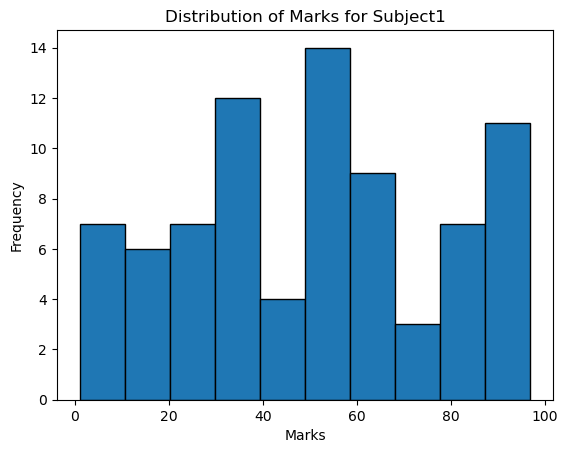

In [10]:
summary_stats = df.describe()

import matplotlib.pyplot as plt
plt.hist(df['Subject1'], bins=10, edgecolor='k')
plt.title('Distribution of Marks for Subject1')
plt.xlabel('Marks')
plt.ylabel('Frequency')
plt.show()


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [12]:
X=df.drop('Subject1', axis=1)
X

,Subject2,Subject3,Subject4,Subject5,Subject6
0,54.386667,79.0,28.0,8.00,86.000000
1,87.000000,60.0,64.0,28.00,100.000000
2,4.000000,19.0,74.0,23.00,54.376623
3,67.000000,53.0,1.0,46.00,1.000000
4,29.000000,90.0,7.0,14.00,86.000000
...,...,...,...,...,...
75,15.000000,68.0,81.0,48.00,5.000000
76,90.000000,74.0,88.0,95.00,23.000000
77,1.000000,46.0,24.0,13.00,97.000000
78,100.000000,33.0,62.0,46.44,17.000000


In [13]:
y=df["Subject1"]
y

0     16.0
1     51.0
2     59.0
3     87.0
4     29.0
      ... 
75    49.0
76    73.0
77    32.0
78    92.0
79    36.0
Name: Subject1, Length: 80, dtype: float64

In [14]:
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=42)

In [15]:
print(Xtrain.shape)
print(Xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(64, 5)
(16, 5)
(64,)
(16,)


In [16]:
print("Xtrain")
print(Xtrain)
print("Xtest")
print(Xtest)
print("ytrain")
print(ytrain)
print("ytest")
print(ytest)

Xtrain
     Subject2   Subject3  Subject4  Subject5  Subject6
73  52.000000  51.736842      32.0      9.00      95.0
61  89.000000  74.000000      56.0     24.00      42.0
55  38.000000  95.000000      23.0     52.00      68.0
40   2.000000  31.000000      27.0      4.00      84.0
9   54.386667  79.000000      15.0     60.00      43.0
..        ...        ...       ...       ...       ...
20  75.000000  24.000000      18.0      4.00      32.0
60  86.000000  51.736842      12.0     84.00      87.0
71  63.000000  95.000000      91.0    100.00      65.0
14  67.000000  24.000000      56.0     46.44      24.0
51  89.000000  59.000000      80.0     85.00      69.0

[64 rows x 5 columns]
Xtest
     Subject2   Subject3  Subject4  Subject5  Subject6
30  17.000000  34.000000      44.0      92.0      94.0
0   54.386667  79.000000      28.0       8.0      86.0
22  40.000000   7.000000      31.0      26.0      83.0
31  63.000000  28.000000      52.0      53.0      17.0
18  88.000000  87.000000     

In [17]:
lr=LinearRegression()
lr.fit(Xtrain,ytrain)

LinearRegression()

In [18]:
ypred=lr.predict(Xtest)
print(ypred)
print(ytest)

[35.80503618 47.47807501 37.70989236 54.25526185 49.19810405 37.103887
 47.52364823 50.23954231 42.82469087 41.70637216 47.87942814 45.05179577
 44.5019949  59.78248779 52.60628682 49.92508229]
30     7.000000
0     16.000000
22    31.000000
31    94.000000
18     4.000000
28    50.028169
10    97.000000
70    84.000000
4     29.000000
12    14.000000
49    41.000000
33    39.000000
67    73.000000
35    86.000000
68    68.000000
45    50.028169
Name: Subject1, dtype: float64
